### Importar librerías y series de datos

In [2]:
import time
start = time.time()

#importar datos y librerias
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
from scipy import special
#leer excel de datos y de dias especiales
general = pd.read_excel (r'.\Data1.xlsx')
special_days= pd.read_excel (r'.\Christmas.xlsx')
#convertir dias especiales a fechas en python
for column in special_days.columns:
    special_days[column] = pd.to_datetime(special_days[column])
general = general.set_index('fecha')

### Establecer las funciones a utilizar

In [3]:
def kronecker(data1:'Dataframe 1',data2:'Dataframe 2'):
    x=0
    data1_kron=data1[x:x+1]
    data2_kron=data2[x:x+1]
    Combinacion=np.kron(data1_kron,data2_kron)
    Combinacion=pd.DataFrame(Combinacion)
    for x in range(1,len(data1)):
        data1_kron=data1[x:x+1]
        data2_kron=data2[x:x+1]
        kron=np.kron(data1_kron,data2_kron)
        Kron=pd.DataFrame(kron)
        Combinacion=Combinacion.append(Kron)
    return Combinacion

In [4]:
def regresion_linear(X:'variables para regresion',y:'datos'):
    global model
    model.fit(X, y)
    coefficients=model.coef_
    return model.predict(X)

In [5]:
def comparacion(real,pred):
    comparacion=pd.DataFrame(columns=['real','prediccion','error'])
    comparacion.real=real
    comparacion.prediccion=pred
    comparacion.error=np.abs((comparacion.real.values-comparacion.prediccion)/comparacion.real)*100
    return comparacion

### Hacer variables dummies

In [6]:
n=-7
final=general.MWh.tail(-n)
onlyMWh=pd.DataFrame(general.MWh)
general['Month'] = general.index.month
general['Weekday_Name'] = general.index.weekday_name
dates=general.index
dummies = pd.get_dummies(general['Weekday_Name']).astype(int)
dummies2 = pd.get_dummies(general['Month']).astype(int)
Dum=pd.DataFrame(dummies.join(dummies2))
t=np.arange(0,len(onlyMWh))
Dum["t"]= np.arange(0,len(onlyMWh))
Dum["tiempo"]= np.arange(1,len(onlyMWh)+1)
Dum["ones"]=np.ones(len(t))
Dum= Dum.set_index('t')

In [7]:
Dum["Dom santo"]=0
Dum["NewYear"]=0
Dum["Constitucion"]=0
Dum["Benito"]=0
Dum["Jue santo"]=0
Dum["Vie santo"]=0
Dum["Trabajo"]=0
Dum["Madre"]=0
Dum["Grito"]=0
Dum["virgen"]=0
Dum["muertos"]=0
Dum["Virgen2"]=0
Dum["Navidad"]=0
Dum["elecciones"]=0
Dum["toma"]=0
Dum["sab santo"]=0
Dum["rev"]=0

ind=0 
for date in general.index:
    for date2 in special_days["Dom santo"]:
        if date ==date2:
            Dum.iloc[ind,21]=1
    for date2 in special_days["NewYear"]:
        if date ==date2:
            Dum.iloc[ind,22]=1
    for date2 in special_days["Constitucion"]:
        if date ==date2:
            Dum.iloc[ind,23]=1
    for date2 in special_days["Benito"]:
        if date ==date2:
            Dum.iloc[ind,24]=1
    for date2 in special_days["Jue santo"]:
        if date ==date2:
            Dum.iloc[ind,25]=1
    for date2 in special_days["Vie santo"]:
        if date ==date2:
            Dum.iloc[ind,26]=1
    for date2 in special_days["Trabajo"]:
        if date ==date2:
            Dum.iloc[ind,27]=1
    for date2 in special_days["Madre"]:
        if date ==date2:
            Dum.iloc[ind,28]=1
    for date2 in special_days["Grito"]:
        if date ==date2:
            Dum.iloc[ind,29]=1
    for date2 in special_days["virgen"]:
        if date ==date2:
            Dum.iloc[ind,30]=1
    for date2 in special_days["muertos"]:
        if date ==date2:
            Dum.iloc[ind,31]=1
    for date2 in special_days["Virgen2"]:
        if date ==date2:
            Dum.iloc[ind,32]=1
    for date2 in special_days["Navidad"]:
        if date ==date2:
            Dum.iloc[ind,33]=1
    for date2 in special_days["elecciones"]:
        if date ==date2:
            Dum.iloc[ind,34]=1
    for date2 in special_days["toma"]:
        if date ==date2:
            Dum.iloc[ind,35]=1
    for date2 in special_days["sab santo"]:
        if date ==date2:
            Dum.iloc[ind,36]=1
    for date2 in special_days["rev"]:
        if date ==date2:
            Dum.iloc[ind,37]=1
    ind+=1
del Dum["Friday"]
Dum.drop(Dum.columns[[15]], axis=1,inplace=True)

### Observar descomposición

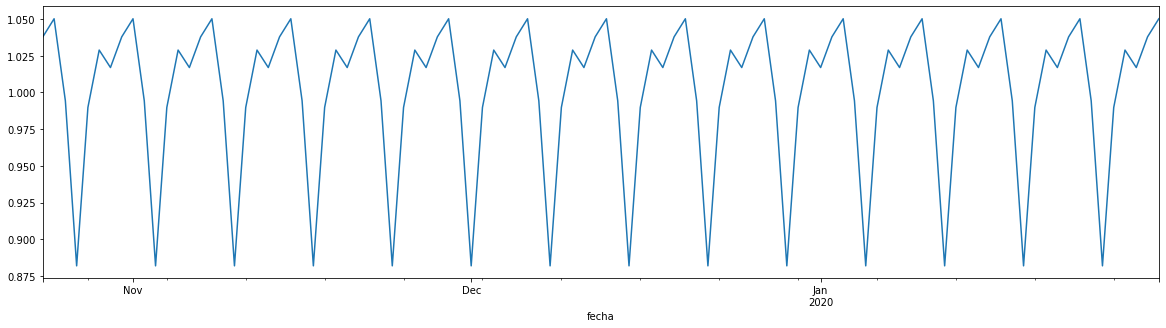

In [8]:
part=general.MWh.tail(100)
result=seasonal_decompose(part, model='multiplicative')
fig = result.seasonal.plot(figsize=(20,5))


Al ver la decomposición, se puede ver por la forma que fourier debe estblecerse en senos y cosenos absolutos, para que se parezca a la estacionalidad de la serie. Se agrega a las variables dummies esta estacionalidad semanal, que parece ser fundamental en los datos

### Detectar efecto de las variables dummies

In [43]:
t=np.arange(1,len(onlyMWh)+1)
Tiempo=pd.DataFrame(t)
Tiempo["one"]=np.ones(len(onlyMWh))
Tiempo['sen']=np.abs(np.sin(((2*np.pi)/14)*t))
Tiempo['cos']=np.abs(np.cos(((2*np.pi)/14)*t))
Combinacion=kronecker(Dum,Tiempo)

In [44]:
Combinacion.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.000000,0.00000,3.0,1.0,0.974928,0.222521,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,5.0,1.0,0.781831,0.62349,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


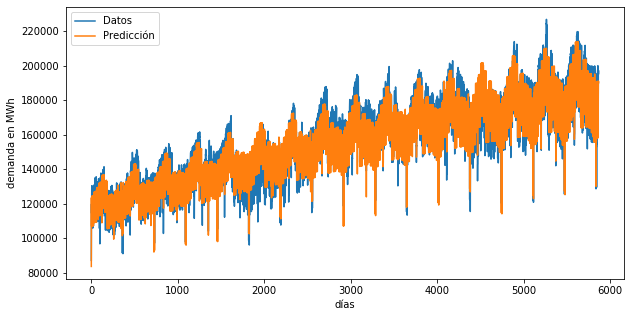

MAPE =  3.4433 %


In [45]:
model = LinearRegression()
prediction=regresion_linear(Combinacion[:n],general.MWh.values[:n])
plt.figure(figsize=(10,5))
plt.plot(onlyMWh.MWh.values[:n],label ="Datos")
plt.plot(prediction,label="Predicción")
plt.ylabel("demanda en MWh")
plt.xlabel("días")
plt.legend()
#plt.axis([1630,1650,120000,160000])
plt.show()
comp=comparacion(onlyMWh.MWh.values[:n],prediction)
MAPE=comp.error.mean()
print("MAPE = ",round(MAPE,4),"%")

### Obtener error de datos con variables dummies vs datos reales

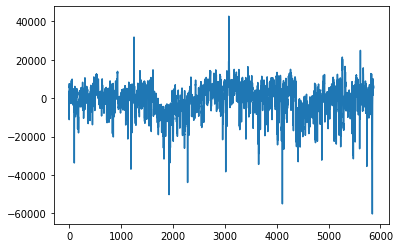

In [46]:
Tabla=pd.DataFrame(columns=['regresion','datos','resta'])
Tabla["regresion"]=prediction
Tabla["datos"]=onlyMWh.MWh.values[:n]
Tabla["resta"]=Tabla.datos-Tabla.regresion
plt.plot(Tabla.resta)
plt.show()

### Establecer las frecuencias que se debe considerar en la serie de fourier

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


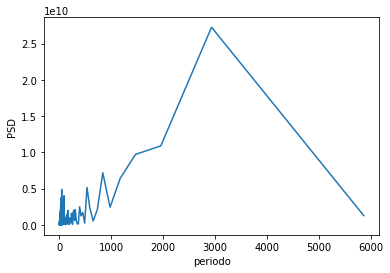

In [47]:
f, Pxx_den = signal.periodogram(Tabla.resta, 1)
plt.plot(1/f, Pxx_den)
plt.xlabel('periodo')
plt.ylabel('PSD')
plt.show()

In [48]:
top_50_periods = {}
# get indices for 3 highest Pxx values
top50_freq_indices = np.flip(np.argsort(Pxx_den), 0)[2:12]

freqs = f[top50_freq_indices]
power = Pxx_den[top50_freq_indices]
periods = 1 / np.array(freqs)
matrix=pd.DataFrame(columns=["power","periods"])
matrix.power=power
matrix.periods=periods
print(matrix)

          power      periods
0  9.713616e+09  1467.000000
1  7.189335e+09   838.285714
2  6.414764e+09  1173.600000
3  5.162053e+09   533.454545
4  4.887537e+09    45.488372
5  4.025407e+09    91.687500
6  3.722729e+09    30.404145
7  3.452944e+09    61.125000
8  3.165323e+09    33.152542
9  3.123875e+09    45.843750


### Hacer la regresión del efecto cruzado de variables dummies y senos/cosenos absolutos de frecuencia de error

In [49]:
sencos = pd.DataFrame()
sencos["t"]=np.arange(1,len(onlyMWh)+1)
for i  in  matrix.periods:
        sencos["{}_sen".format(i)] = np.abs(np.sin(((2*np.pi)/i)*t))
        sencos["{}_cos".format(i)] = np.abs(np.cos(((2*np.pi)/i)*t))
sencos["unos"] = 1
sencos['sen']=np.abs(np.sin(((2*np.pi)/14)*t))
sencos['cos']=np.abs(np.cos(((2*np.pi)/14)*t))
sencos['sen1']=np.abs(np.sin(((2*np.pi)/365)*t))
sencos['cos1']=np.abs(np.cos(((2*np.pi)/365)*t))
sencos['sen2']=np.abs(np.sin(((2*np.pi)/28)*t))
sencos['cos2']=np.abs(np.cos(((2*np.pi)/28)*t))

In [50]:
sencos_test=sencos[n:]
sencos_train=sencos[0:n]
Dum_test=Dum[n:]
Dum_train=Dum[0:n]
Combinacion=kronecker(Dum_train,sencos_train)

In [51]:
model = LinearRegression()
prediction=regresion_linear(Combinacion,general.MWh.values[0:n])

### MAPE de la regresion

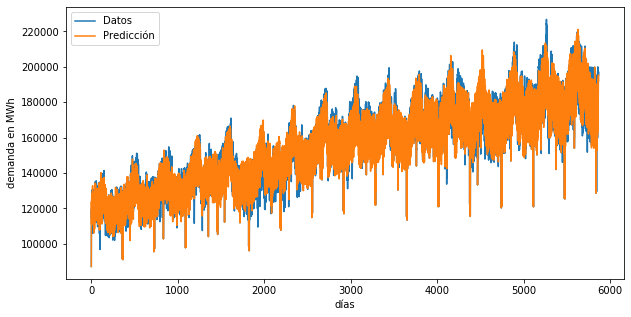

MAPE =  2.4666 %


In [52]:
plt.figure(figsize=(10,5))
plt.plot(onlyMWh.MWh[0:n].values,label ="Datos")
plt.plot(prediction,label="Predicción")
plt.ylabel("demanda en MWh")
plt.xlabel("días")
plt.legend()
plt.show()
#%%obtener mape de regresión
comp=comparacion(onlyMWh.MWh.values[:n],prediction)
MAPE=comp.error.mean()
print("MAPE = ",round(MAPE,4),"%")

### Graficar residuales de la regresión

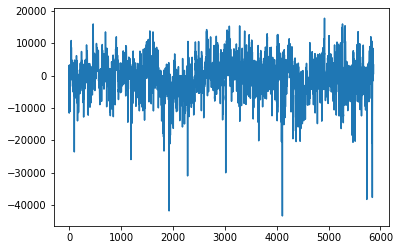

In [53]:
Tabla=pd.DataFrame(columns=['regresion','datos','resta'])
Tabla["regresion"]=prediction
Tabla["datos"]=onlyMWh.MWh[0:n].values
Tabla["resta"]=Tabla.datos-Tabla.regresion
plt.plot(Tabla.resta)
plt.show()

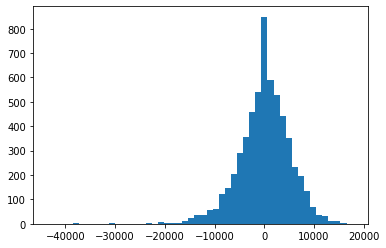

In [54]:
plt.hist(Tabla["resta"],bins=50)
plt.show()

In [55]:
resta=pd.DataFrame(Tabla["resta"])

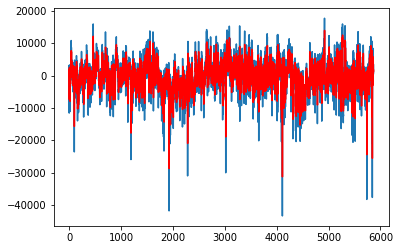

In [56]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(resta, order=(2,0,4))
results = mod.fit()
plt.plot(resta)
plt.plot(results.fittedvalues, color='red')

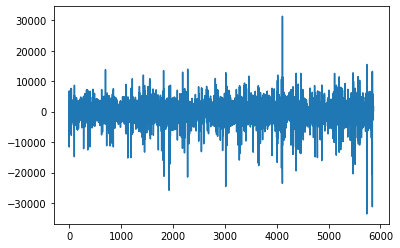

In [57]:
T=pd.DataFrame(columns=['regresion','datos','nuevo'])
T["regresion"]=results.fittedvalues
T["datos"]=resta
T["nuevo"]=T.datos-T.regresion
plt.plot(T.nuevo)
plt.show()

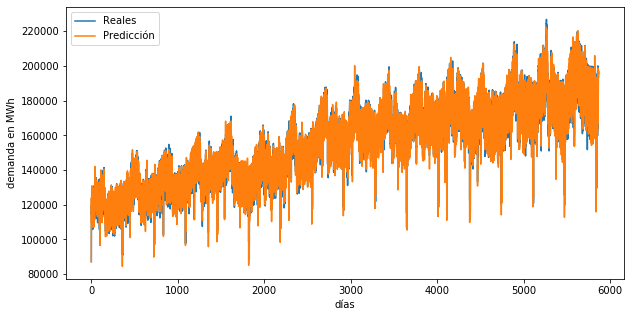

MAPE =  1.5201726833 %


In [58]:
##spatial electric load forecasting
plt.figure(figsize=(10,5))
plt.plot(onlyMWh.MWh[0:n].values,label="Reales")
plt.plot(prediction+results.fittedvalues,label="Predicción")
#plt.axis([1630,1650,120000,160000])
plt.ylabel("demanda en MWh")
plt.xlabel("días")
plt.legend()
plt.show()
#%%obtener mape de regresión
comp=comparacion(onlyMWh.MWh[0:n].values,prediction+results.fittedvalues)
MAPE=comp.error.mean()
print("MAPE = ",round(MAPE,10),"%")

### Gráfica de manera dinámica

In [59]:
extra=results.predict(len(onlyMWh.MWh[0:n]),len(onlyMWh.MWh[0:n])-n)
extra=extra.iloc[1:]

In [60]:
from sklearn.linear_model import Lasso
Combinaciontest=kronecker(Dum_test,sencos_test)
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(Combinacion,onlyMWh.MWh[0:n])
coeff = lasso_reg.coef_
#coeff
#Predicting for X_test
y_pred_lass =lasso_reg.predict(Combinaciontest)

In [61]:
coeff = np.sum(abs(lasso_reg.coef_)==0)
coeff

800

In [26]:
len(lasso_reg.coef_)

1008

In [27]:
#comb=Combinacion
#comb2=Combinaciontest
#x=np.where(lasso_reg.coef_==0)

In [28]:
#comb=comb.drop(comb.columns[x], axis=1)
#comb2=comb2.drop(comb2.columns[x], axis=1)

In [29]:
#from sklearn.linear_model import HuberRegressor
#huber = HuberRegressor().fit(comb,onlyMWh.MWh[0:n])
#hubpredict=huber.predict(comb2)

### todo para pronóstico

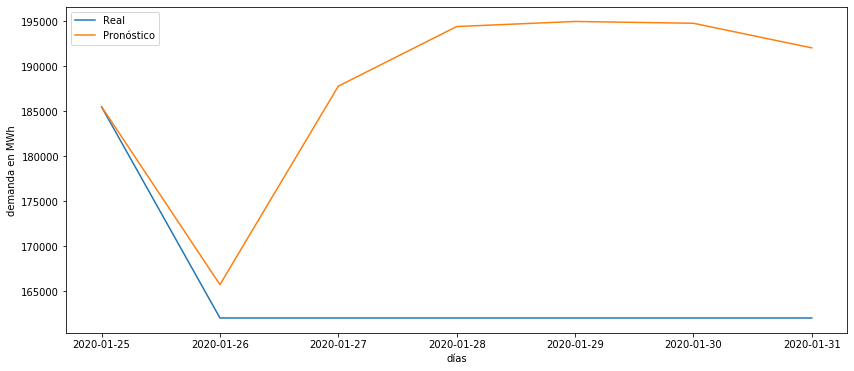

MAPE =  13.901 %


In [68]:
comp_pronostico=comparacion(final,y_pred_lass+extra.values)
#comp_pronostico=comparacion(final,hubpredict+extra.values)
MAPE=comp_pronostico.error.mean()
plt.figure(figsize=(14,6))
plt.plot(final,label="Real")
plt.plot(comp_pronostico.prediccion,label="Pronóstico")
plt.ylabel("demanda en MWh")
plt.xlabel("días")
plt.legend()
plt.show()
print("MAPE = ",round(MAPE,4),"%")

In [31]:
comp_pronostico

,real,prediccion,error
fecha,,,
2020-01-25,185464.0,185489.586920,0.013796
2020-01-26,162000.0,165705.942838,2.287619
2020-01-27,162000.0,187766.796460,15.905430
2020-01-28,162000.0,194396.731152,19.997982
2020-01-29,162000.0,194960.442863,20.345952
2020-01-30,162000.0,194760.776282,20.222701
2020-01-31,162000.0,192024.572973,18.533687


In [32]:
end = time.time()
print((end - start)/60)

6.494935023784637


In [33]:
model =LinearRegression()
model.fit(comb,onlyMWh.MWh[0:n])
prediction=model.predict(comb2)
comp_pronostico=comparacion(final,prediction+extra.values)
MAPE=comp_pronostico.error.mean()
plt.figure(figsize=(10,5))
plt.plot(final,label="Real")
plt.plot(comp_pronostico.prediccion,label="Pronóstico")
plt.ylabel("demanda en MWh")
plt.xlabel("días")
plt.legend()
plt.show()
print("MAPE = ",round(MAPE,4),"%")

NameError: name 'comb' is not defined

In [ ]:
comp_pronostico 799,39.39 58.39 13.01

In [ ]:
lasso_reg = Lasso(normalize=True)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(comb,onlyMWh.MWh[0:n])
coeff = lasso_reg.coef_
#coeff
#Predicting for X_test
y_pred_lass =lasso_reg.predict(comb2)
comp_pronostico=comparacion(final,y_pred_lass+extra.values)
MAPE=comp_pronostico.error.mean()
plt.figure(figsize=(10,5))
plt.plot(final,label="Real")
plt.plot(comp_pronostico.prediccion,label="Pronóstico")
plt.ylabel("demanda en MWh")
plt.xlabel("días")
plt.legend()
plt.show()
print("MAPE = ",round(MAPE,4),"%")

In [ ]:
#coeff = lasso_reg.coef_
#coeff